# Importing Libraries

In [88]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



In [89]:
attrition_data = pd.read_csv('C:/Users/HP/Desktop/Train.csv')

In [90]:
attrition_data.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [91]:
attrition_data.columns


Index(['Employee_ID', 'Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7', 'Attrition_rate'],
      dtype='object')

In [92]:
attrition_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        6588 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            6856 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  6991 non-null   float

In [93]:
attrition_data.describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
count,6588.000000,7000.000000,6856.000000,7000.000000,7000.000000,7000.000000,7000.000000,6991.000000,6989.000000,7000.000000,6423.000000,7000.000000,6344.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,39.622799,3.187857,13.385064,2.367143,47.064286,0.817857,2.798000,6.006294,2.387895,3.098571,-0.008126,-0.013606,1.891078,2.834143,7.101286,3.257000,0.189376
std,13.606920,1.065102,10.364188,1.149395,15.761406,0.648205,1.163721,2.058435,1.122786,0.836377,0.989850,0.986933,0.529403,0.938945,1.164262,0.925319,0.185753
min,19.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.817600,-2.776200,1.000000,1.000000,5.000000,1.000000,0.000000
25%,27.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,3.000000,-0.961200,-0.453700,2.000000,2.000000,6.000000,3.000000,0.070400
50%,37.000000,3.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,3.000000,-0.104800,-0.453700,2.000000,3.000000,7.000000,3.000000,0.142650
75%,52.000000,4.000000,21.000000,3.000000,61.000000,1.000000,3.000000,8.000000,3.000000,3.000000,0.751600,0.707500,2.000000,3.000000,8.000000,4.000000,0.235000
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,5.000000,1.608100,1.868800,3.000000,5.000000,9.000000,5.000000,0.995900


In [94]:
attrition_data.shape

(7000, 24)

In [95]:
attrition_data.isnull().any()

Employee_ID                  False
Gender                       False
Age                           True
Education_Level              False
Relationship_Status          False
Hometown                     False
Unit                         False
Decision_skill_possess       False
Time_of_service               True
Time_since_promotion         False
growth_rate                  False
Travel_Rate                  False
Post_Level                   False
Pay_Scale                     True
Compensation_and_Benefits    False
Work_Life_balance             True
VAR1                         False
VAR2                          True
VAR3                         False
VAR4                          True
VAR5                         False
VAR6                         False
VAR7                         False
Attrition_rate               False
dtype: bool

# Data preprocesing
### Fill Missing Null values

In [96]:
null_columns = []
for col in attrition_data.columns:
    if attrition_data[col].isnull().any() == True:
        null_columns.append(col)
null_columns

['Age', 'Time_of_service', 'Pay_Scale', 'Work_Life_balance', 'VAR2', 'VAR4']

In [97]:
def fillNullValues(data,col):
    data[col].fillna((data[col].mean()),inplace=True)

In [98]:
for col in null_columns:
    fillNullValues(attrition_data,col)

In [99]:
attrition_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        7000 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            7000 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  7000 non-null   float

# Visualization

In [100]:
Attrition = list(attrition_data['Attrition_rate'].round(decimals=2))

In [101]:
attrition_data['Attrition'] = Attrition
attrition_data.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate,Attrition
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,3.0,4,0.7516,1.8688,2.000000,4,5,3,0.1841,0.18
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,4.0,3,-0.9612,-0.4537,2.000000,3,5,3,0.0670,0.07
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,1.0,4,-0.9612,-0.4537,3.000000,3,8,3,0.0851,0.09
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,1.0,3,-1.8176,-0.4537,1.891078,3,7,3,0.0668,0.07
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,3.0,1,0.7516,-0.4537,2.000000,2,8,2,0.1827,0.18


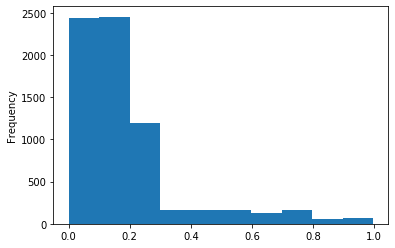

In [75]:
attrition_data.Attrition_rate.plot.hist();

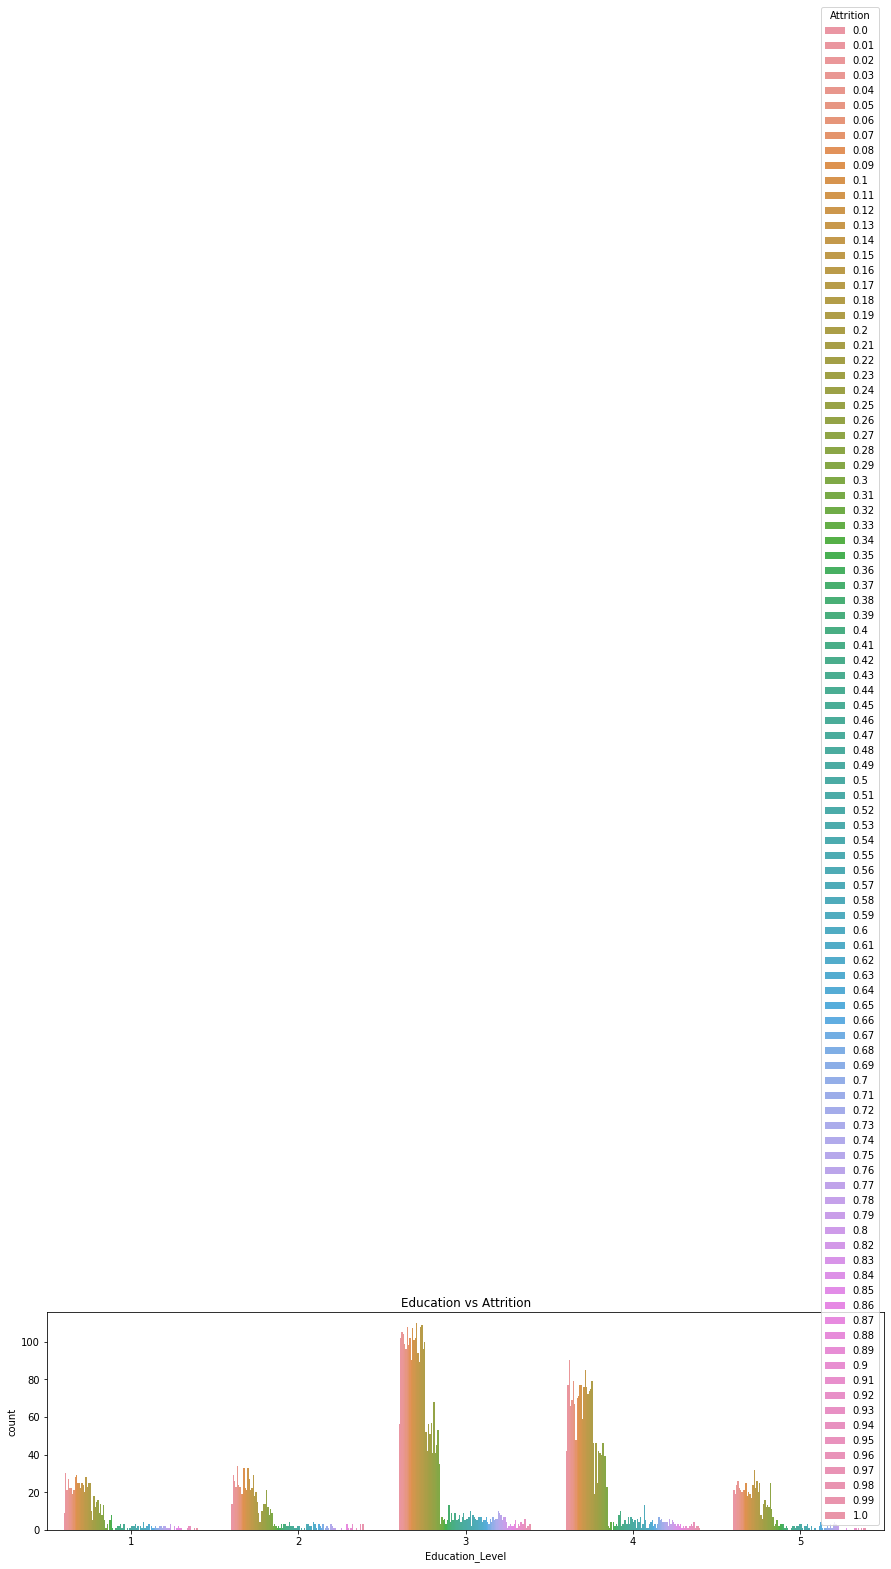

In [16]:
plt.subplots(figsize= (15, 4))
plt.title('Education vs Attrition')
sns.countplot(x = "Education_Level", hue = "Attrition", data = attrition_data)
plt.show()
plt.close()

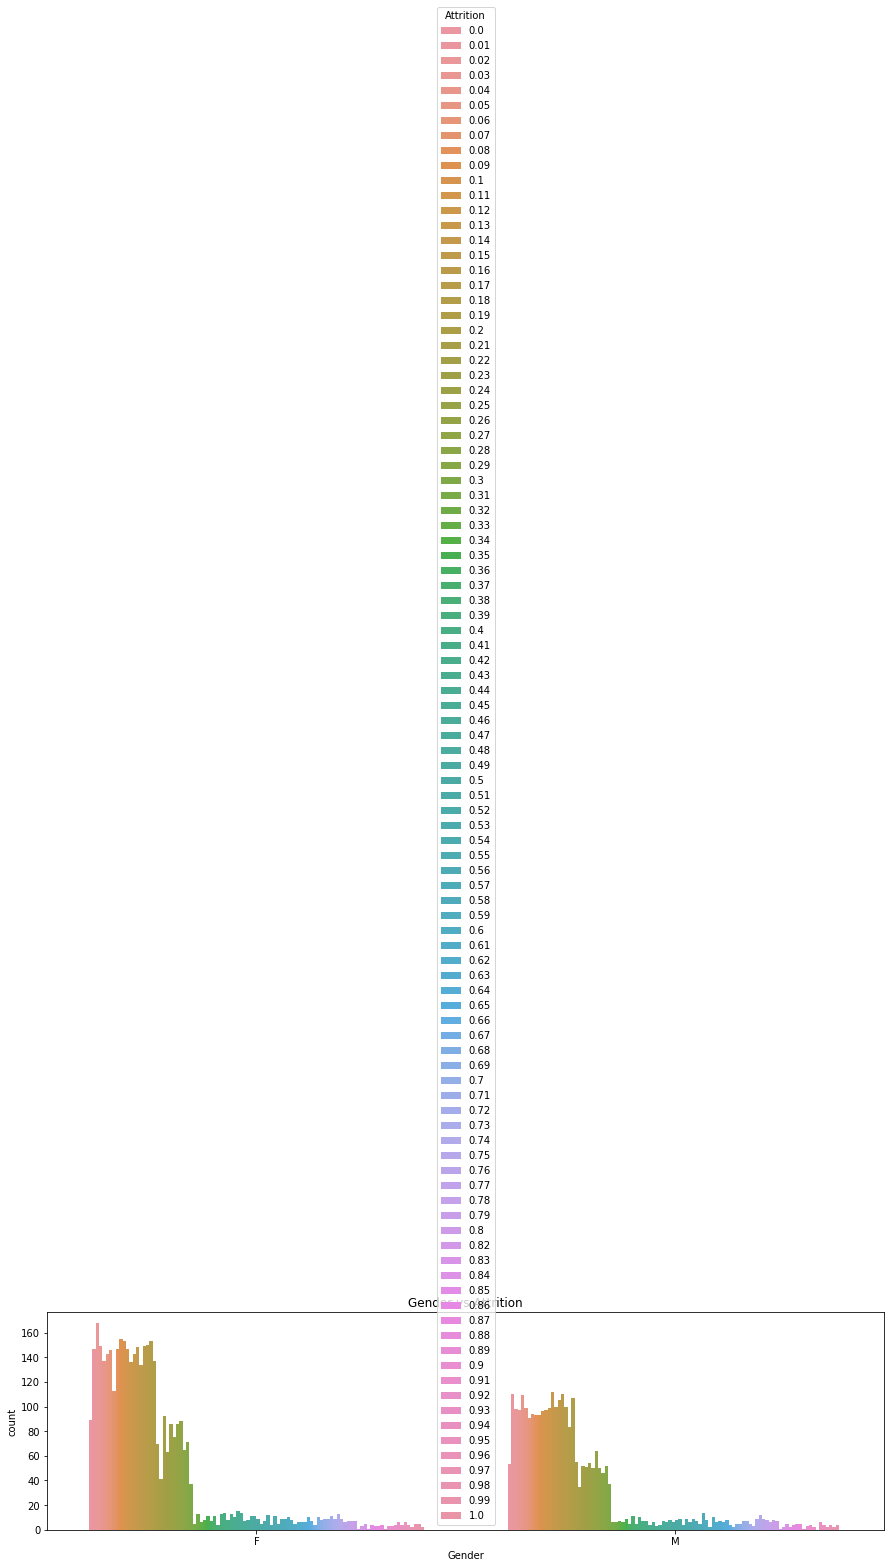

In [17]:
plt.subplots(figsize= (15, 4))
plt.title('Gender vs Attrition')
sns.countplot(x = "Gender", hue = "Attrition", data = attrition_data)
plt.show()
plt.close()

# Correlation

In [76]:
attrition_data.corr()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate,Attrition
Age,1.000000,-0.005599,0.883423,0.141393,0.001230,0.011897,0.002367,0.012578,0.002985,0.005534,0.005023,0.007356,0.001664,0.000014,-0.000809,0.008476,-0.015086,-0.014782
Education_Level,-0.005599,1.000000,-0.012657,-0.002077,0.002991,-0.017690,0.009986,0.006830,-0.015241,-0.002185,-0.009894,-0.009689,0.004283,0.005444,0.009195,0.012909,-0.008143,-0.007891
Time_of_service,0.883423,-0.012657,1.000000,0.135671,-0.003452,0.004791,-0.002261,0.020085,-0.002527,0.004715,0.003659,0.006804,-0.005679,0.003158,0.007542,0.006972,-0.016213,-0.015948
Time_since_promotion,0.141393,-0.002077,0.135671,1.000000,0.014147,-0.012061,-0.008851,-0.008896,-0.007418,-0.002873,0.004022,-0.002783,-0.003549,0.000563,0.017264,0.005173,0.013880,0.014251
growth_rate,0.001230,0.002991,-0.003452,0.014147,1.000000,0.008460,-0.006887,-0.004143,-0.018306,0.001351,0.010437,0.010991,0.020272,-0.015122,-0.005860,-0.017993,0.014247,0.013896
Travel_Rate,0.011897,-0.017690,0.004791,-0.012061,0.008460,1.000000,0.021299,-0.011681,0.004129,0.023898,0.008002,-0.009019,-0.005639,-0.003866,-0.012280,-0.006271,-0.012608,-0.012740
Post_Level,0.002367,0.009986,-0.002261,-0.008851,-0.006887,0.021299,1.000000,0.022376,-0.014460,-0.008458,-0.006750,0.010387,-0.012172,0.013008,0.002765,-0.003397,0.016402,0.016443
Pay_Scale,0.012578,0.006830,0.020085,-0.008896,-0.004143,-0.011681,0.022376,1.000000,-0.022704,0.011346,0.006035,0.003378,-0.009742,0.018070,-0.012315,0.002379,-0.015221,-0.015195
Work_Life_balance,0.002985,-0.015241,-0.002527,-0.007418,-0.018306,0.004129,-0.014460,-0.022704,1.000000,-0.022025,-0.001423,0.004473,-0.025473,0.022178,0.003869,0.024506,0.020738,0.020587
VAR1,0.005534,-0.002185,0.004715,-0.002873,0.001351,0.023898,-0.008458,0.011346,-0.022025,1.000000,0.002181,-0.003318,0.002009,0.007904,-0.002771,0.009355,-0.008073,-0.007924


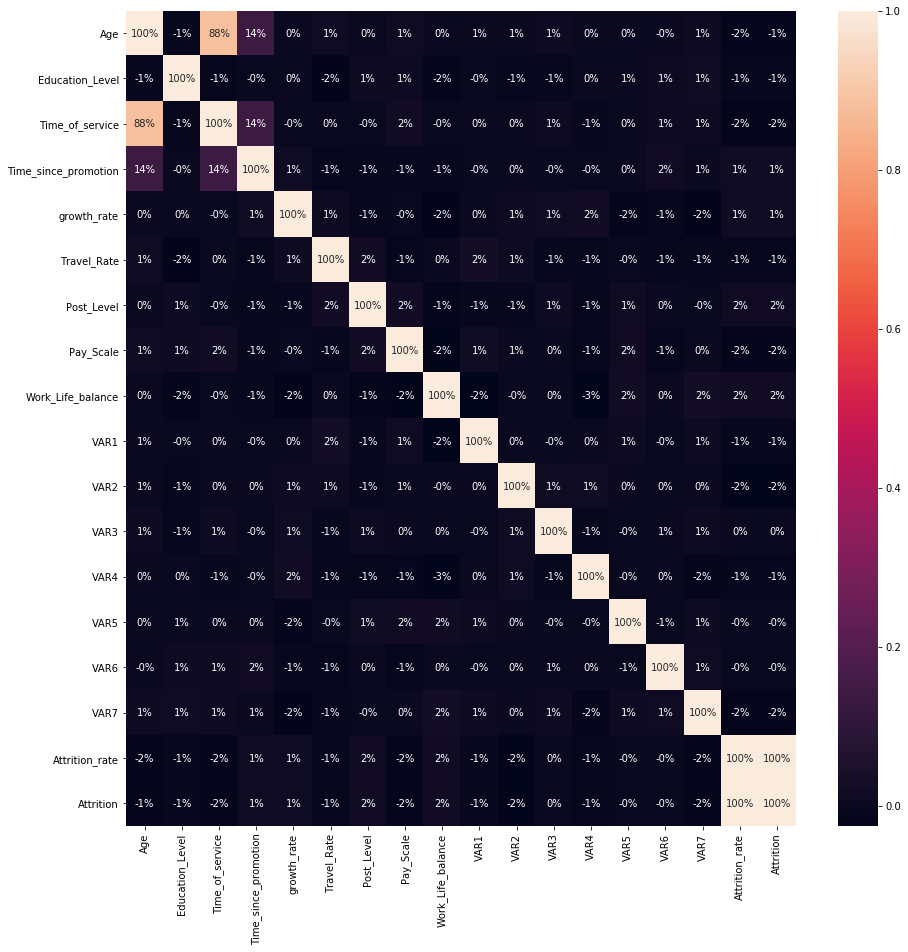

In [77]:
plt.figure(figsize= (15,15))
sns.heatmap(attrition_data.corr(), annot=True, fmt = '.0%')
plt.show()
plt.close()


## Label Encoding

In [102]:
#Label encoding
from sklearn.preprocessing import LabelEncoder as le
for col in attrition_data.columns:
    if attrition_data[col].dtype == 'int64'or attrition_data[col].dtype == 'float64':
        continue
    else:
        attrition_data[col] = le().fit_transform(attrition_data[col])

In [103]:
attrition_data.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate,Attrition
0,4143,0,42.0,4,0,1,2,2,4.0,4,...,3.0,4,0.7516,1.8688,2.000000,4,5,3,0.1841,0.18
1,2500,1,24.0,3,1,3,3,0,5.0,4,...,4.0,3,-0.9612,-0.4537,2.000000,3,5,3,0.0670,0.07
2,5312,0,58.0,3,0,0,8,2,27.0,3,...,1.0,4,-0.9612,-0.4537,3.000000,3,8,3,0.0851,0.09
3,2339,0,26.0,3,1,2,1,1,4.0,3,...,1.0,3,-1.8176,-0.4537,1.891078,3,7,3,0.0668,0.07
4,3885,0,31.0,1,0,3,3,2,5.0,4,...,3.0,1,0.7516,-0.4537,2.000000,2,8,2,0.1827,0.18


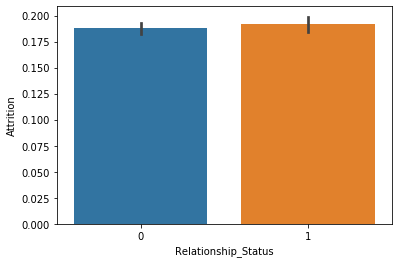

In [80]:
sns.barplot(x = 'Relationship_Status',y = 'Attrition', data = attrition_data)
plt.show()

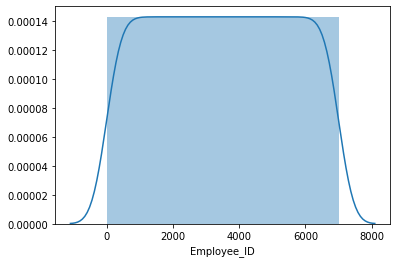

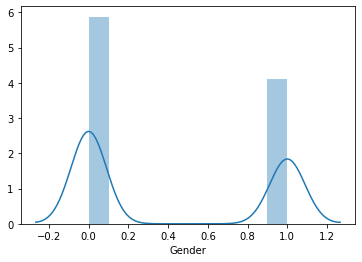

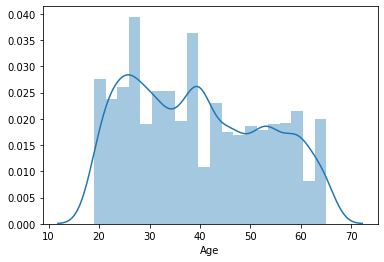

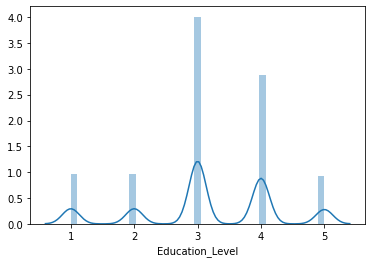

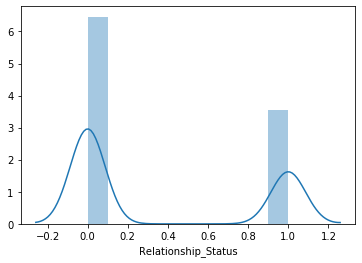

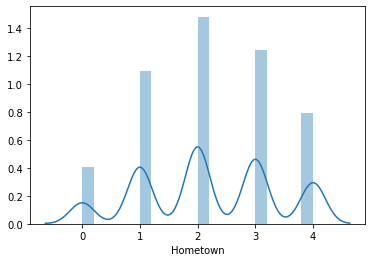

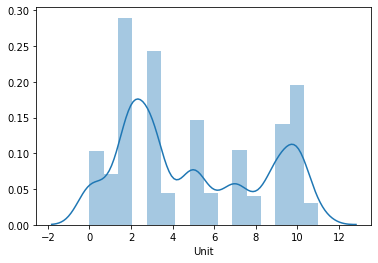

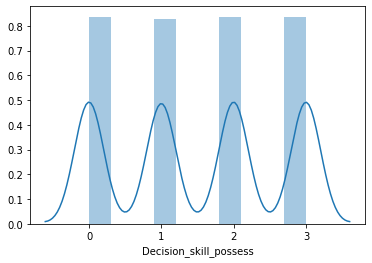

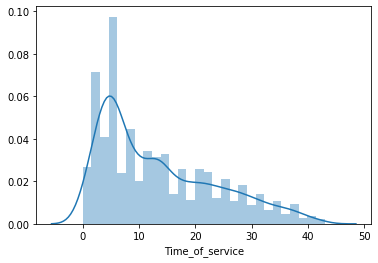

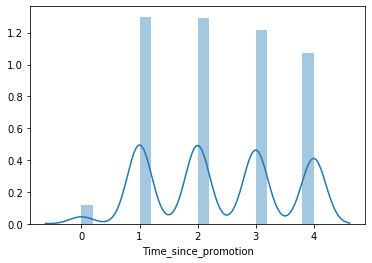

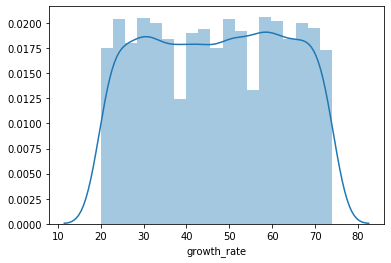

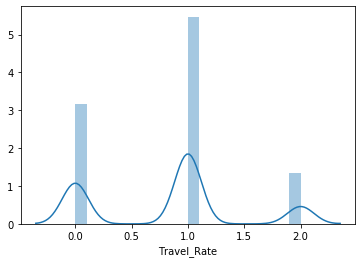

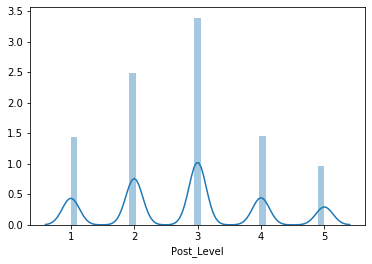

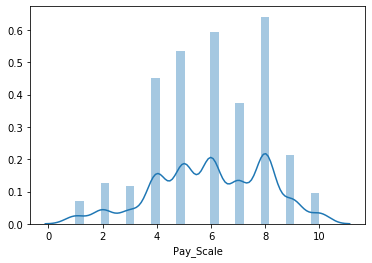

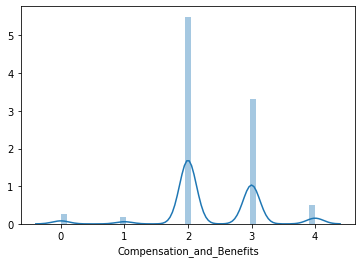

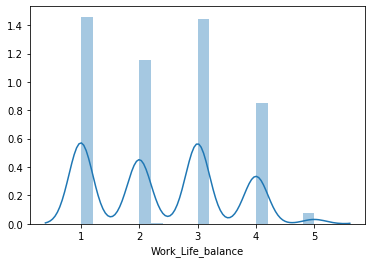

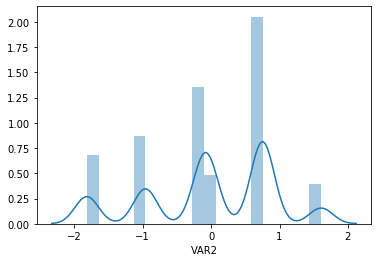

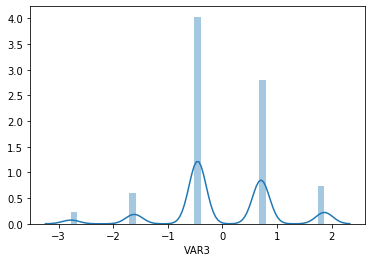

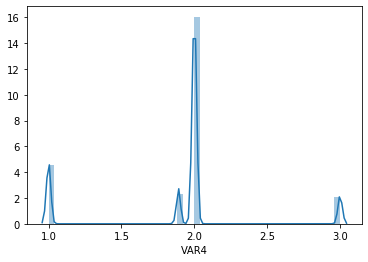

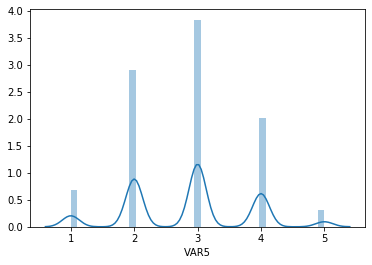

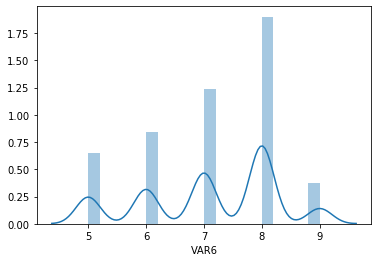

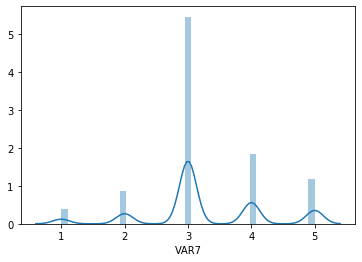

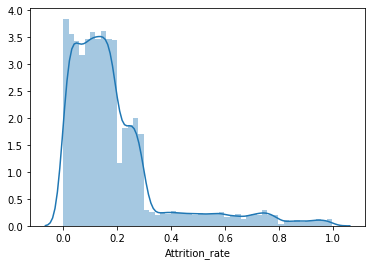

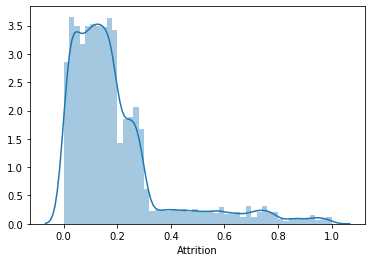

In [108]:
for col in attrition_data.columns:
    if col == 'VAR1':
        continue
    sns.distplot(attrition_data[col])
    plt.show()
    plt.close()
    

### Removing Unnecessary Columns

In [81]:
attrition_data = attrition_data.drop(['Employee_ID'], axis = 1)
attrition_data.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,...,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate,Attrition
0,0,42.0,4,0,1,2,2,4.0,4,33,...,3.0,4,0.7516,1.8688,2.000000,4,5,3,0.1841,0.18
1,1,24.0,3,1,3,3,0,5.0,4,36,...,4.0,3,-0.9612,-0.4537,2.000000,3,5,3,0.0670,0.07
2,0,58.0,3,0,0,8,2,27.0,3,51,...,1.0,4,-0.9612,-0.4537,3.000000,3,8,3,0.0851,0.09
3,0,26.0,3,1,2,1,1,4.0,3,56,...,1.0,3,-1.8176,-0.4537,1.891078,3,7,3,0.0668,0.07
4,0,31.0,1,0,3,3,2,5.0,4,62,...,3.0,1,0.7516,-0.4537,2.000000,2,8,2,0.1827,0.18


In [86]:
attrition_data.columns

Index(['Employee_ID', 'Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7', 'Attrition_rate', 'Attrition'],
      dtype='object')

In [83]:
features = attrition_data.drop(['Attrition_rate','Attrition'], axis=1)
labels = attrition_data['Attrition_rate']


In [84]:
Attrition = attrition_data['Attrition_rate'].round(decimals=2)
print(Attrition.nunique())
print(Attrition.value_counts())

100
0.02    266
0.16    259
0.01    257
0.13    255
0.17    250
       ... 
0.67      6
0.96      6
0.82      4
1.00      2
0.89      2
Name: Attrition_rate, Length: 100, dtype: int64


In [85]:
Attrition1 = attrition_data['Attrition_rate'].round(decimals=1)
print(Attrition1.nunique())
print(Attrition1.value_counts())

11
0.1    2390
0.2    1761
0.0    1289
0.3     740
0.4     172
0.5     157
0.7     147
0.6     142
0.8      99
0.9      67
1.0      36
Name: Attrition_rate, dtype: int64


In [86]:
Attrition2 = attrition_data['Attrition_rate'].round(decimals=0)
print(Attrition2.nunique())
print(Attrition2.value_counts())

2
0.0    6426
1.0     574
Name: Attrition_rate, dtype: int64


In [87]:
features = StandardScaler().fit_transform(features)

In [88]:
print(features)

[[-0.83756018  0.18009898  0.76255659 ...  1.24175608 -1.80495079
  -0.27776175]
 [ 1.19394406 -1.18359795 -0.17638732 ...  0.17665468 -1.80495079
  -0.27776175]
 [-0.83756018  1.39227403 -0.17638732 ...  0.17665468  0.77197263
  -0.27776175]
 ...
 [-0.83756018  0.71042557 -0.17638732 ...  1.24175608  0.77197263
  -0.27776175]
 [-0.83756018  0.55890369 -0.17638732 ...  0.17665468 -0.94597631
  -0.27776175]
 [-0.83756018  1.39227403 -0.17638732 ...  1.24175608 -1.80495079
  -0.27776175]]


In [111]:
attrition_data.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,...,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate,Attrition
0,0,42.0,4,0,1,2,2,4.0,4,33,...,3.0,4,0.7516,1.8688,2.000000,4,5,3,0.1841,0.0
1,1,24.0,3,1,3,3,0,5.0,4,36,...,4.0,3,-0.9612,-0.4537,2.000000,3,5,3,0.0670,0.0
2,0,58.0,3,0,0,8,2,27.0,3,51,...,1.0,4,-0.9612,-0.4537,3.000000,3,8,3,0.0851,0.0
3,0,26.0,3,1,2,1,1,4.0,3,56,...,1.0,3,-1.8176,-0.4537,1.891078,3,7,3,0.0668,0.0
4,0,31.0,1,0,3,3,2,5.0,4,62,...,3.0,1,0.7516,-0.4537,2.000000,2,8,2,0.1827,0.0


In [110]:
attrition_data['Attrition'] = Attrition2

In [89]:
pca = PCA(n_components=2)

pct = pca.fit_transform(features)

print(np.cumsum(pca.explained_variance_ratio_))
principal_df = pd.DataFrame(pct,columns=['pc1', 'pc2'])
display(principal_df)
finaldf = pd.concat([principal_df,labels],axis=1)
finaldf1 = pd.concat([principal_df, attrition_data['Attrition']],axis=1)
finaldf2 = pd.concat([principal_df, Attrition1], axis=1)
finaldf3 = pd.concat([principal_df, Attrition2], axis=1)

[0.0876319  0.13679114]


,pc1,pc2
0,-0.138430,-1.019015
1,-1.197114,-0.145412
2,2.063519,0.731752
3,-1.221082,0.995053
4,-0.775728,0.564028
...,...,...
6995,-1.801819,-0.707911
6996,0.259483,-0.448174
6997,0.030633,-1.034340
6998,0.899785,0.134321


In [90]:
print(principal_df)
print(finaldf)
print(finaldf1)

           pc1       pc2
0    -0.138430 -1.019015
1    -1.197114 -0.145412
2     2.063519  0.731752
3    -1.221082  0.995053
4    -0.775728  0.564028
...        ...       ...
6995 -1.801819 -0.707911
6996  0.259483 -0.448174
6997  0.030633 -1.034340
6998  0.899785  0.134321
6999  1.494176 -0.541019

[7000 rows x 2 columns]
           pc1       pc2  Attrition_rate
0    -0.138430 -1.019015          0.1841
1    -1.197114 -0.145412          0.0670
2     2.063519  0.731752          0.0851
3    -1.221082  0.995053          0.0668
4    -0.775728  0.564028          0.1827
...        ...       ...             ...
6995 -1.801819 -0.707911          0.7839
6996  0.259483 -0.448174          0.1055
6997  0.030633 -1.034340          0.7847
6998  0.899785  0.134321          0.4162
6999  1.494176 -0.541019          0.0910

[7000 rows x 3 columns]
           pc1       pc2  Attrition
0    -0.138430 -1.019015       0.18
1    -1.197114 -0.145412       0.07
2     2.063519  0.731752       0.09
3    -1.221082

In [91]:
print(finaldf2)
print(finaldf3)

           pc1       pc2  Attrition_rate
0    -0.138430 -1.019015             0.2
1    -1.197114 -0.145412             0.1
2     2.063519  0.731752             0.1
3    -1.221082  0.995053             0.1
4    -0.775728  0.564028             0.2
...        ...       ...             ...
6995 -1.801819 -0.707911             0.8
6996  0.259483 -0.448174             0.1
6997  0.030633 -1.034340             0.8
6998  0.899785  0.134321             0.4
6999  1.494176 -0.541019             0.1

[7000 rows x 3 columns]
           pc1       pc2  Attrition_rate
0    -0.138430 -1.019015             0.0
1    -1.197114 -0.145412             0.0
2     2.063519  0.731752             0.0
3    -1.221082  0.995053             0.0
4    -0.775728  0.564028             0.0
...        ...       ...             ...
6995 -1.801819 -0.707911             1.0
6996  0.259483 -0.448174             0.0
6997  0.030633 -1.034340             1.0
6998  0.899785  0.134321             0.0
6999  1.494176 -0.541019        

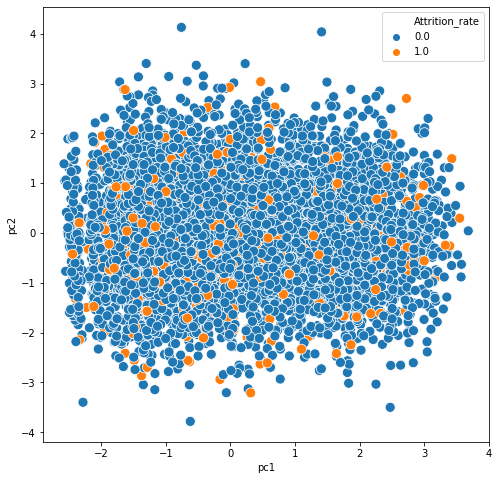

In [92]:

plt.figure(figsize=(8,8))
sns.scatterplot(x='pc1', y='pc2', hue='Attrition_rate', data=finaldf3, s=100)
plt.show()

### Logistic Regression after dimensionality reduction

In [124]:
features = finaldf[['pc1', 'pc2']]
label = finaldf['Attrition_rate']

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.35, random_state=42, shuffle=True)
model = LogisticRegression()

In [144]:
x_train.shape
finaldf3

,pc1,pc2,Attrition_rate
0,-0.138430,-1.019015,0.0
1,-1.197114,-0.145412,0.0
2,2.063519,0.731752,0.0
3,-1.221082,0.995053,0.0
4,-0.775728,0.564028,0.0
...,...,...,...
6995,-1.801819,-0.707911,1.0
6996,0.259483,-0.448174,0.0
6997,0.030633,-1.034340,1.0
6998,0.899785,0.134321,0.0


In [126]:
encoded = le().fit_transform(y_train)


In [127]:
encoded1 = le().fit_transform(y_test)

model.fit(x_train, encoded)
print(model.score)

<bound method ClassifierMixin.score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>


In [128]:
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

print(f"Train Accuracy: {accuracy_score(encoded, train_pred)*100:.2f}")
print(f"Test Accuracy: {accuracy_score(encoded1, test_pred)*100:.2f}")

Train Accuracy: 92.31
Test Accuracy: 90.86


### Logistic Regression

In [129]:
features = attrition_data.drop(['Attrition_rate','Attrition'], axis=1)
labels = attrition_data['Attrition_rate']


In [130]:
features = StandardScaler().fit_transform(features)

In [131]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.35, random_state=42, shuffle=True)
model = LogisticRegression()

In [132]:
x_train.shape


(4550, 22)

In [133]:
encoded = le().fit_transform(y_train)
encoded1 = le().fit_transform(y_test)

model.fit(x_train, encoded)
print(model.score)

<bound method ClassifierMixin.score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>


In [134]:
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

print(f"Train Accuracy: {accuracy_score(encoded, train_pred)*100:.2f}")
print(f"Test Accuracy: {accuracy_score(encoded1, test_pred)*100:.2f}")

Train Accuracy: 66.09
Test Accuracy: 0.04


In [135]:
from sklearn.metrics import f1_score
print(f"Train Accuracy: {f1_score(encoded, train_pred, average = 'weighted')*100:.2f}")
print(f"Test Accuracy: {f1_score(encoded1, test_pred, average = 'weighted')*100:.2f}")

Train Accuracy: 62.91
Test Accuracy: 0.03


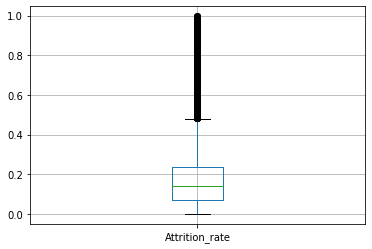

In [165]:
attrition_data.boxplot(['Attrition_rate'])

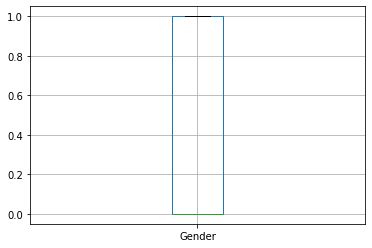

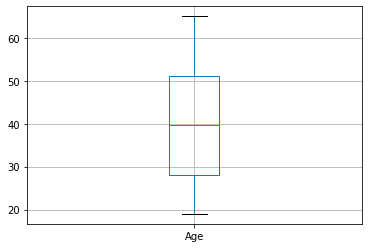

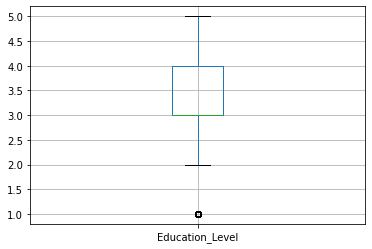

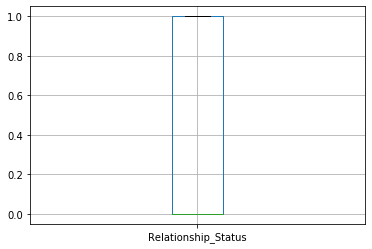

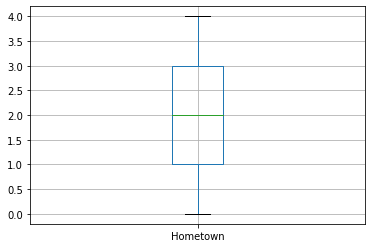

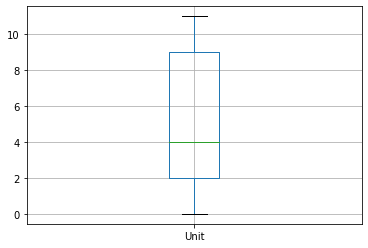

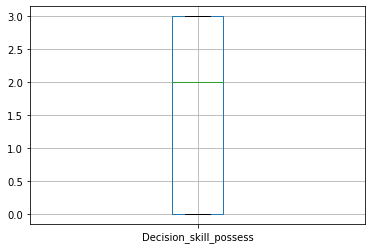

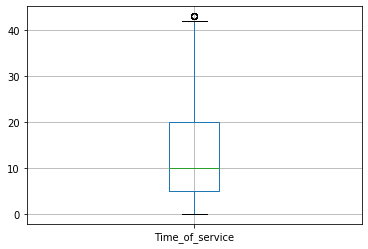

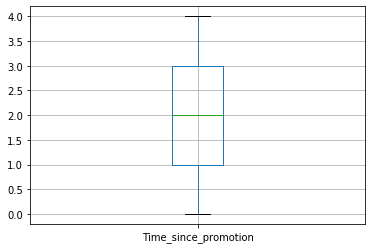

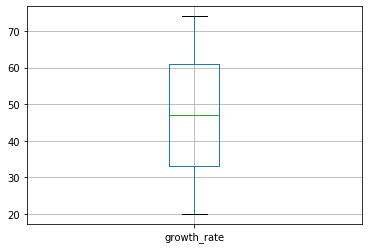

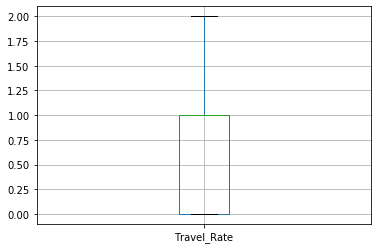

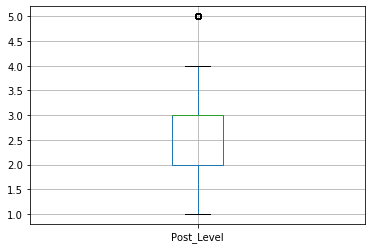

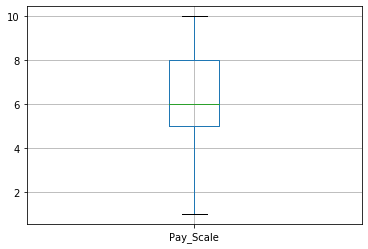

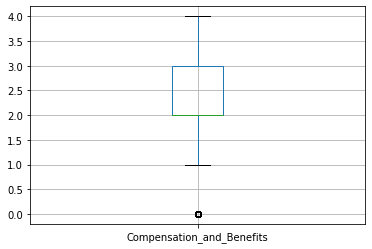

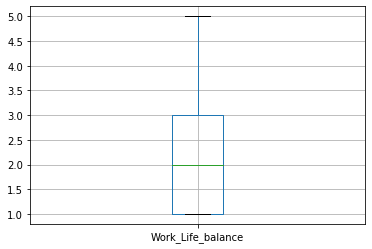

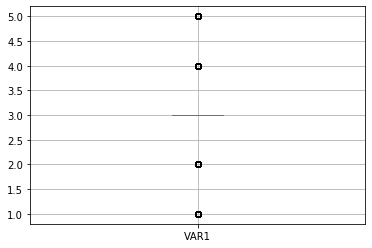

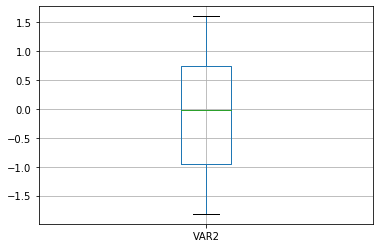

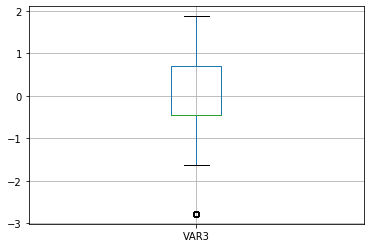

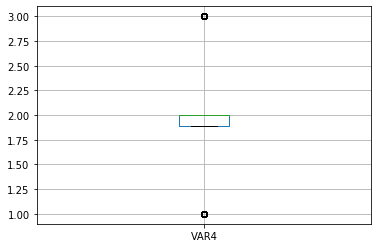

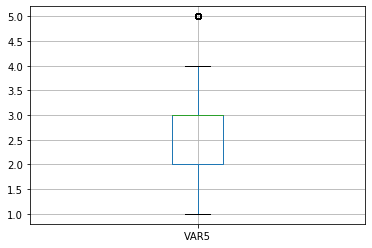

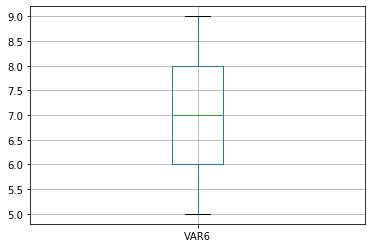

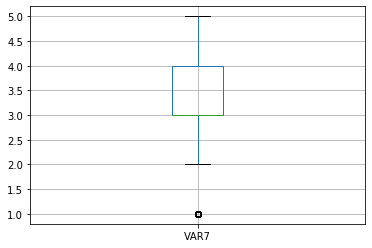

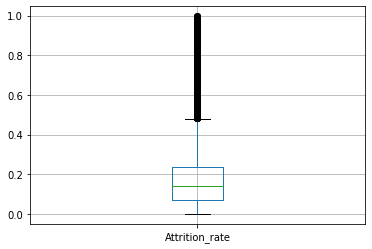

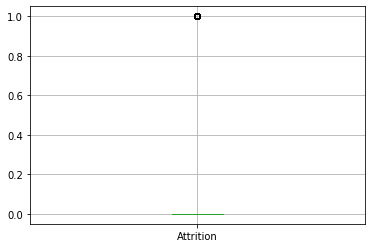

In [166]:
for col in attrition_data:
    attrition_data.boxplot([col])
    plt.show()
    plt.close()